In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
import ipywidgets as widgets

In [2]:
data = pandas.read_table('1335.vdb.tab', sep = '\t', header = 0)
data = data.sort_values(by = ['OTUConTaxonomy'])
data = data.reset_index(drop=True)

list_taxon=['Domaine','Embranchement','Classe','Ordre',"Famille","Genre"]
for i in range(6):
    colname = list_taxon[i]
    data[colname]=data.apply(lambda row:row.OTUConTaxonomy.split(";")[i].split("(")[0],axis=1)
    
data['OTU'] = data.apply(lambda row:row.OTUNumber.replace('Otu',''), axis=1)
data = data.drop(columns=['OTUConTaxonomy','OTUNumber'])
data.columns=['Door1','Door2','FaucetHandle1','FaucetHandle2','SinkFloor1','SinkFloor2','Soap Dispenser','Stall','ToiletFloor1','ToiletFloor2','ToiletFlushHandle1','ToiletFlushHandle2','ToiletSeat1','ToiletSeat2','Domaine','Embranchement','Classe','Ordre','Famille','Genre','OTU']
data

,Door1,Door2,FaucetHandle1,FaucetHandle2,SinkFloor1,SinkFloor2,Soap Dispenser,Stall,ToiletFloor1,ToiletFloor2,...,ToiletFlushHandle2,ToiletSeat1,ToiletSeat2,Domaine,Embranchement,Classe,Ordre,Famille,Genre,OTU
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp1,Gp1,unclassified,unclassified,01745
1,0,0,0,0,3,0,0,0,0,0,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp1,Gp1,unclassified,unclassified,01118
2,0,0,0,0,3,4,0,0,9,0,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp16,Gp16,unclassified,unclassified,00220
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp16,Gp16,unclassified,unclassified,02978
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp16,Gp16,unclassified,unclassified,02405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,03538
4101,0,0,0,0,1,0,0,0,0,0,...,0,0,0,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,03529
4102,0,0,0,0,0,0,0,0,0,1,...,0,0,0,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,00726
4103,0,0,0,0,0,1,0,0,2,0,...,0,3,0,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,00601


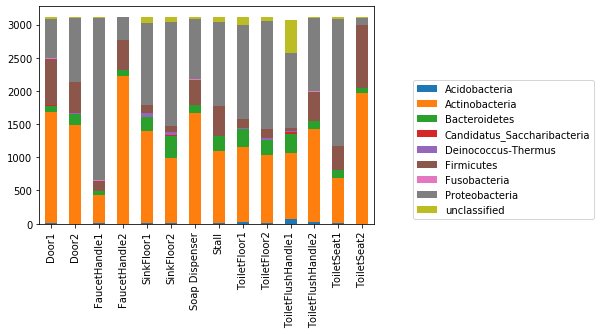

In [3]:
#EMB = data.groupby(by=['Embranchement']).sum()

AMB = pandas.pivot_table(data,columns = 'Embranchement',aggfunc='sum')
vec = AMB.apply(lambda col:col.sum()>=50, axis=0)


AMB=AMB.loc[:,vec]

ax = AMB.plot(kind="bar",stacked=True)
ax.legend(loc='lower left',fontsize=10, bbox_to_anchor=(1.1,0))

In [4]:
res_list={}

for taxon in list_taxon[1:]:
    res = pandas.pivot_table(data,columns = taxon,aggfunc='sum')
    mask = res.apply(lambda col:col.sum()>=50, axis=0)

    res = res.loc[:,mask]
    res_list[taxon] = res

res_list['Embranchement']

Embranchement,Acidobacteria,Actinobacteria,Bacteroidetes,Candidatus_Saccharibacteria,Deinococcus-Thermus,Firmicutes,Fusobacteria,Proteobacteria,unclassified
Door1,6,1669,100,10,10,686,15,593,30
Door2,0,1483,170,0,20,457,7,960,22
FaucetHandle1,3,434,54,0,0,155,8,2445,19
FaucetHandle2,0,2224,84,1,12,440,12,340,6
SinkFloor1,17,1382,201,12,59,123,1,1229,89
SinkFloor2,13,978,333,6,50,94,2,1555,85
Soap Dispenser,0,1665,127,0,0,378,14,897,30
Stall,11,1077,235,0,0,446,0,1272,78
ToiletFloor1,19,1133,267,6,23,130,3,1419,106
ToiletFloor2,16,1013,228,3,28,131,2,1634,60


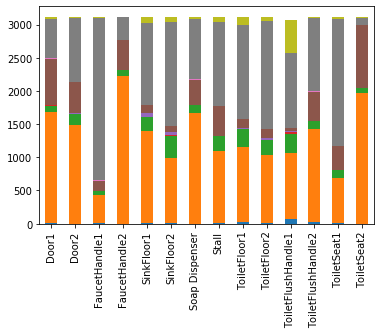

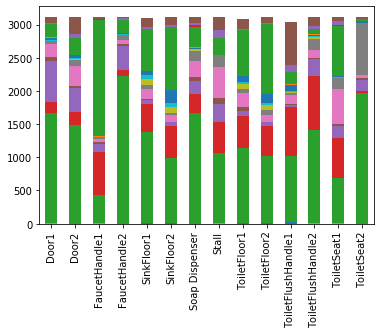

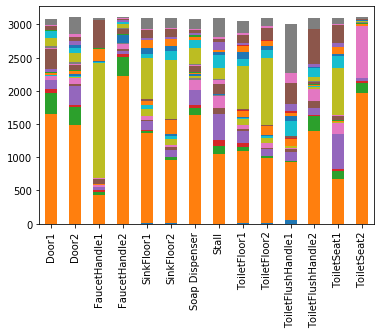

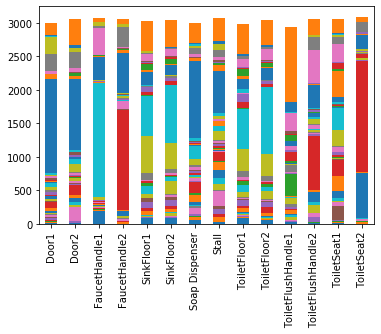

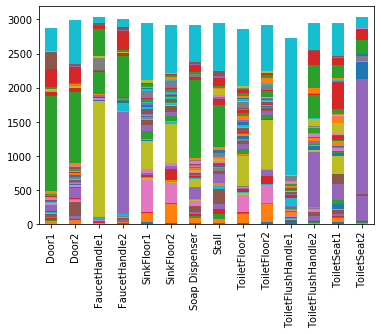

In [5]:
for i in range(len(res_list)):
    res_list[list_taxon[i+1]].plot(kind="bar",stacked=True, legend = False)

#res_list[list_taxon[i]].plot(kind="bar",stacked=True, legend = False)

In [6]:
w = widgets.Dropdown(
    options=list_taxon,
    value='Embranchement',
    description='taxon:',
)

def plot_func(tax):
    res_list[tax].plot(kind="bar",stacked=True, legend =  True)

widgets.interact(plot_func, tax=w)

interactive(children=(Dropdown(description='taxon:', index=1, options=('Domaine', 'Embranchement', 'Classe', '…

<function __main__.plot_func(tax)>

In [29]:
res_list['Embranchement']


Embranchement,Acidobacteria,Actinobacteria,Bacteroidetes,Candidatus_Saccharibacteria,Deinococcus-Thermus,Firmicutes,Fusobacteria,Proteobacteria,unclassified
Door1,6,1669,100,10,10,686,15,593,30
Door2,0,1483,170,0,20,457,7,960,22
FaucetHandle1,3,434,54,0,0,155,8,2445,19
FaucetHandle2,0,2224,84,1,12,440,12,340,6
SinkFloor1,17,1382,201,12,59,123,1,1229,89
SinkFloor2,13,978,333,6,50,94,2,1555,85
Soap Dispenser,0,1665,127,0,0,378,14,897,30
Stall,11,1077,235,0,0,446,0,1272,78
ToiletFloor1,19,1133,267,6,23,130,3,1419,106
ToiletFloor2,16,1013,228,3,28,131,2,1634,60
